## Predicting Heart Disease using machine learning

Problem : Using python libraries and open-source data, to develope a machine learning algorithm to predict heart disease in patients.

Workflow:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Optimization
7. Experimentation

## 1. Problem definition

> Given a clinical dataset about patients, can we predict which patients have heart disease ?


## 2. Data

The original data set used is the UCI machine learning dataset for heart disease : https://archive.ics.uci.edu/ml/datasets/heart+disease


## 3. Evaluation 

> If we can reach a 95% of accuracy in predicting wheter or not a patient have heart disease, we will pursue the project. 

### 4.  Feature engineering 

This is where you get information about the different features in the data 

* Data dictionary :

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type
    
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
    
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest
    
    looks at stress of heart during excercise
    unhealthy heart will stress more

slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
    
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

thal - thalium stress result
    
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the data analysis tools :
* Pandas
* NumPy
* Matplotlib

In [87]:
# Importing tools 

# Regular EDA (Exploratory data analysis) and plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sklearn.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load data

In [88]:
df = pd.read_csv("Data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## EDA (Exploratory data analysis)

#### Recomendation : Become an expert in the subject matter of the datasets you are using. 

Some questions :
1. What problem are you trying to solve? 
2. How do we treat different types in our data?
3. What is the relation between the features? 
4. What data is missing?
5. Where are the outliers and why you should care about them ?
6. How can you add, remove or change features in your data?

In [89]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

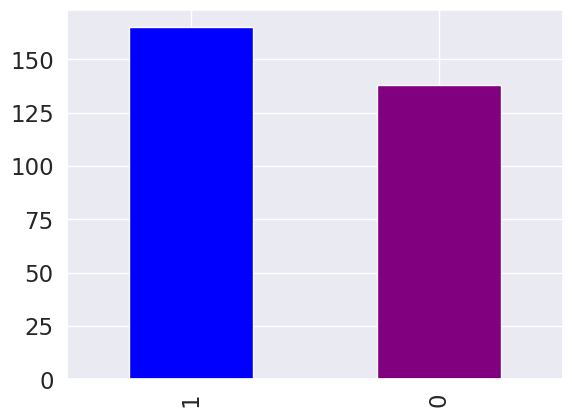

In [90]:
df["target"].value_counts().plot(kind="bar", color=["Blue", "purple"])

In [91]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  Finding patterns : 

* Heart disease frequency according to Sex.

In [93]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [94]:
#1 Compare target value with Sex column 

pd.crosstab(df.target, df.sex)

# Some conclusions (In our data set, not the real world) :
# There are more male with heart disease
# The porcentage of women with heart disease is higher than that of men 

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

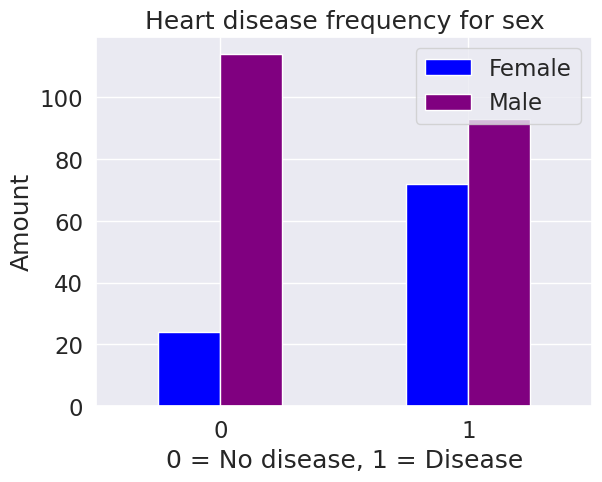

In [95]:
# 2. Create a plot of crosstab 

pd.crosstab(df.target, df.sex).plot(kind="bar", color=["Blue", "Purple"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Max heart rate for heart disease

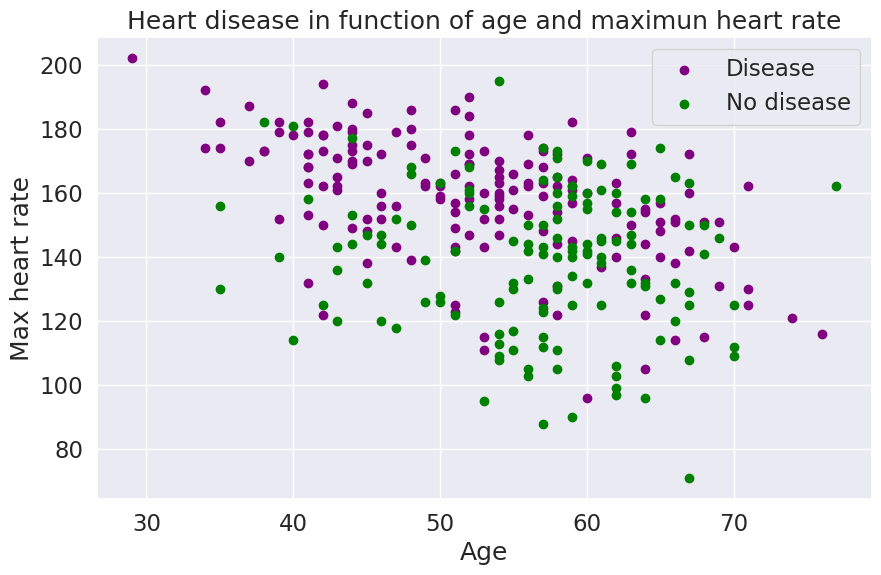

In [97]:
# Create another figure 

plt.figure(figsize=(10, 6))

# Create scatter plot

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
           color="Purple")

# Scatter with negative examples 

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="green")

# Tunning plot

plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.title("Heart disease in function of age and maximun heart rate")
plt.legend(["Disease", "No disease"])

In [98]:
# Plot analysis : 
# 1. Thalach : Maximun heart rate achieved by the person. 
# 2. The maximun heart rate seems to decrease with age (Possible biased inference)

<AxesSubplot:ylabel='Frequency'>

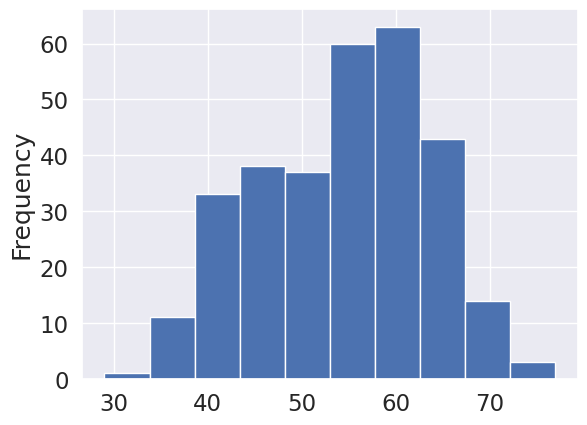

In [99]:
# Check the normal distribution of the age

df.age.plot.hist()

### Heart disease frequency per chest pain type 

cp - chest pain type
    
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease


In [100]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


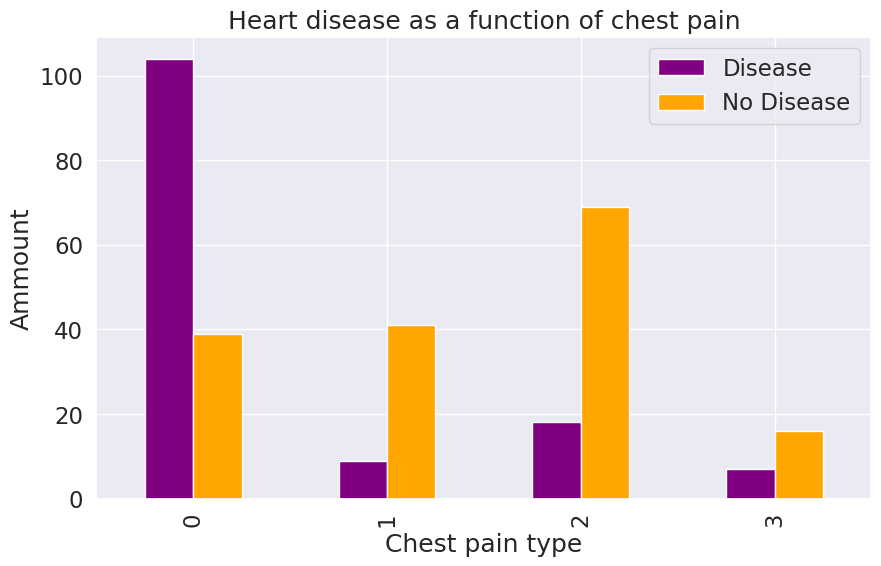

In [101]:
# Make the crosstab more visual 

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["Purple", "Orange"])

# Tunning plot 

plt.title("Heart disease as a function of chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Ammount")
plt.legend(["Disease", "No Disease"])

About Exploratory data analysis : The importance of EDA is to formulate important questions about the dataset.

In [102]:
# Problem : Try to find correlation between variables

In [103]:
# Correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


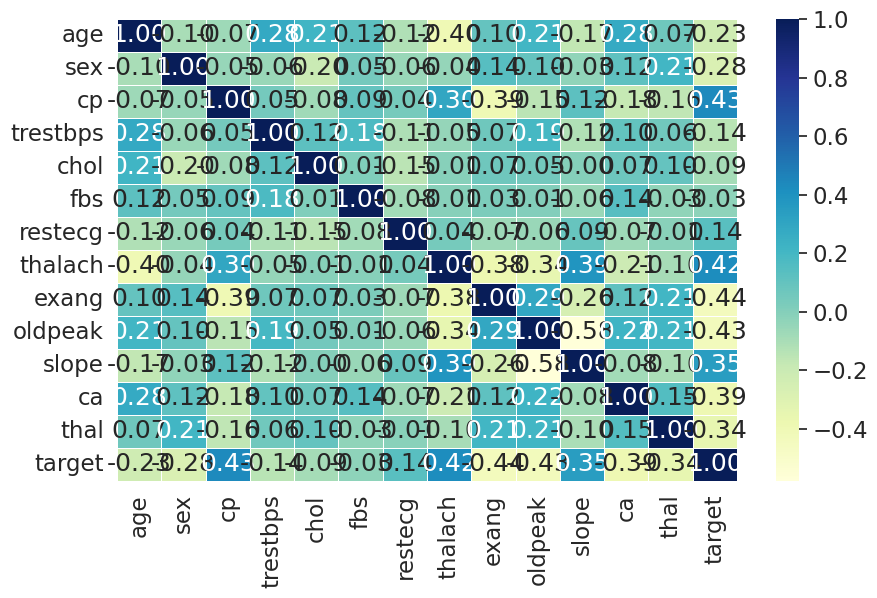

In [104]:
# Plotting correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix, 
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modeling

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
# Split data into X & Y

X = df.drop("target" , axis=1)

y = df["target"]

In [107]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [108]:

y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [109]:
# Split data into Train and Test

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size=0.2)

In [110]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


### Building the machine learning algorithm - Choosing the right model:

1. Logistic Regression
2. K - nearest neighbor classifier
3. Random Forest Classifier

In [111]:
# Put models in a dictionary 

models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given ML models
    """
    
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    
    model_scores = {}
    
    # Loop through models 
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Evalaute the models
        
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores


In [112]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/home/bach/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparasion

<AxesSubplot:>

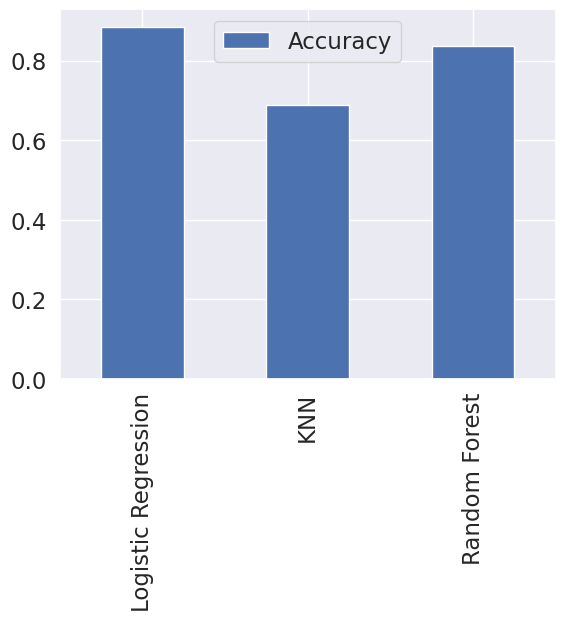

In [113]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

## Tunning the algorithm

Now we got a baseline algorithm, and its accuracy can be improved. What should we do next ?
Lets look at the following :

1. Hyperparameter tunning
2. Feature importance
3. Confusion matrix
4. Cross - validation
5. Precision 
6. Recall
7. F1 Score
8. Classification report
9. Roc Curve
10. Area under Roc Curve

### Hyperparameter tunning 

In [114]:
# Tunning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors 
neighbors = range(1, 21)

# Setup KNN instance 

knn = KNeighborsClassifier(n_neighbors=100)

# loop through different n_neighbors 

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train)
    
    # Update the trainning scores list 
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores lists 
    test_scores.append(knn.score(X_test, y_test))

In [115]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [116]:
test_scores


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [117]:
len(test_scores)

20

KNN maximun score on the test data: 75.41%


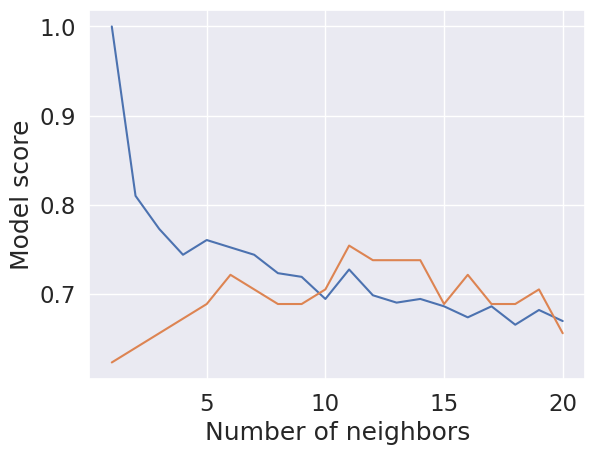

In [118]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")

print(f"KNN maximun score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tunning with RandomizedSearchCV

Tune the following algorithms:
* LogisticRegression()
* RandomForestClassifier()


In [119]:
# Create an hyperparameter tunning for logisticRegreesion

log_reg_grid = {"C" : np.logspace(-4, 4, 20), "solver" : ["liblinear"]}

In [120]:
# Create a hyperparameter grid for randomClassifier

rf_grid = {"n_estimators": np.arange(10,1000, 50),
           "max_depth" : [None, 3, 5 ,9],
           "min_samples_leaf" : np.arange(1, 20 ,3)}

Now we got hyperparameter tunning for RandomizedSearchCV, lets tune using RandomizedSearchCV

In [121]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5,
                                n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [122]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [123]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Run the algorithm 


In [124]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=10,
                          verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 9],
                                        'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [125]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [126]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

## Hyperparameter tunning with GridSearchCV


In [127]:
log_reg_grid = {"C" : np.logspace(-4, 4, 40), 
               "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [128]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [129]:
y_preds = gs_log_reg.predict(X_test)

/home/bach/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


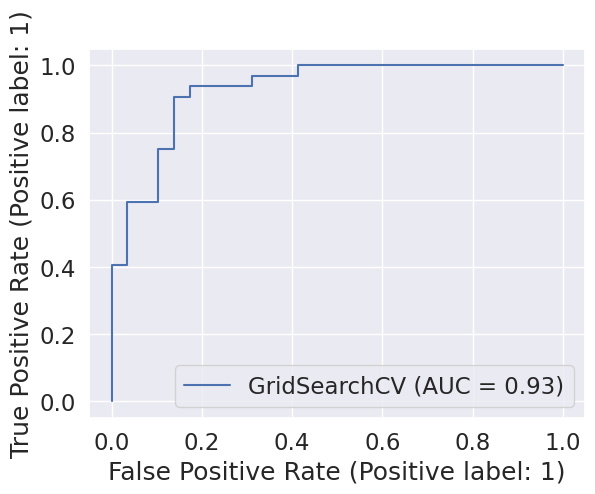

In [130]:
plot_roc_curve(gs_log_reg, X_test, y_test )

In [131]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


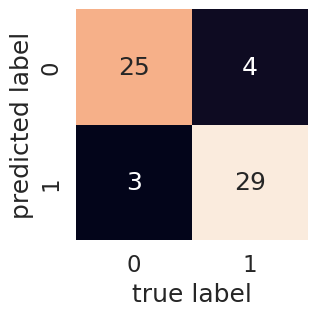

In [132]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [133]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evalaution metrics using cross-validation


In [135]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [136]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [137]:
# cross - validated precision 

In [83]:
# Cross - validated recall 

In [138]:
# Cross - validated f1 - score  